In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from level import LevelMap


In [3]:
level = LevelMap()
first = level.generate_empty_map(20, (20 // 2, 20 // 2))
first


[[Tile(x=0, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=1, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=2, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=3, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=4, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=5, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=6, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=7, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=8, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=9, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=10, y=0, is_visited=0, visiting_agent=[], code_block=<CodeBlock.EMPTY: 'empty'>),
  Tile(x=

In [6]:
len(first)


20

In [4]:
# seed random number generator
seed(1)


NameError: name 'seed' is not defined

In [ ]:
# actions
ACTION = ['move_forward', 'turn_left', 'turn_right', 'turn_left$move_forward',
          'turn_right$move_forward', 'move_forward$move_forward']


In [ ]:
# programming operators
OPERATORS = ['if', 'if_else', 'while', 'do_while']


In [ ]:
# number of agents
TOTAL_AGENTS = 3


In [ ]:
# direction
DIRECTION = ['north', 'south', 'east', 'west']


In [ ]:
# size
size = [20, 20]


In [ ]:
start_tile = Tile(size[0] // 2, size[1] // 2)


In [ ]:
level_map = LevelMap(mesh_coords, start_tile)


In [ ]:
for agent_id in range(1, TOTAL_AGENTS + 1):
    agent = Agent(agent_id, level_map)
    total_steps = randint(1, 5)

    while (total_steps >= 0):
        basket_size = randint(1, 10)
        actions = choices(
            ACTION, weights=[0.2, 0.1, 0.1, 0.2, 0.2, 0.2], k=basket_size)
        for action in actions:
            for sub_action in action.split('$'):
                agent.perform_action(sub_action)
            total_steps -= 1
    print(agent.path)
    dfS = pd.DataFrame(mesh_coords)


[Tile(x=10, y=10, visited_agent=1, code_block='empty'), Tile(x=10, y=12, visited_agent=1, code_block='move_forward'), Tile(x=10, y=14, visited_agent=1, code_block='move_forward'), Tile(x=10, y=16, visited_agent=1, code_block='move_forward'), Tile(x=8, y=16, visited_agent=1, code_block='move_forward'), Tile(x=6, y=16, visited_agent=1, code_block='move_forward'), Tile(x=4, y=16, visited_agent=1, code_block='move_forward'), Tile(x=4, y=14, visited_agent=1, code_block='move_forward'), Tile(x=2, y=14, visited_agent=1, code_block='move_forward'), Tile(x=2, y=12, visited_agent=1, code_block='move_forward'), Tile(x=2, y=10, visited_agent=1, code_block='move_forward'), Tile(x=2, y=8, visited_agent=1, code_block='move_forward'), Tile(x=0, y=8, visited_agent=1, code_block='move_forward')]
[Tile(x=10, y=10, visited_agent=2, code_block='empty'), Tile(x=8, y=10, visited_agent=2, code_block='move_forward'), Tile(x=8, y=8, visited_agent=2, code_block='move_forward'), Tile(x=8, y=6, visited_agent=2, co

In [ ]:
df = pd.DataFrame(mesh_coords)


In [ ]:
df.head()


,x,y,visited_agent,code_block
0,0,0,0,empty
1,0,1,0,empty
2,0,2,0,empty
3,0,3,0,empty
4,0,4,0,empty


<AxesSubplot:xlabel='x', ylabel='y'>

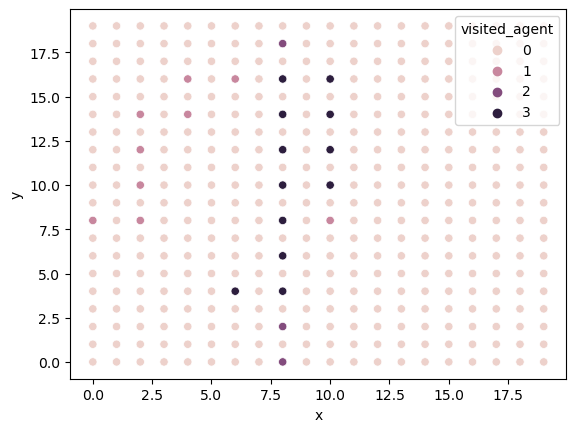

In [ ]:
sns.scatterplot(data=df, x='x', y='y', hue='visited_agent')


In [7]:
from mazelib import Maze


In [36]:
from mazelib.generate.AldousBroder import AldousBroder
from mazelib.solve.BacktrackingSolver import BacktrackingSolver
from mazelib.solve.ShortestPaths import ShortestPaths


In [74]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def showPNG(grid, start, end):
    """Generate a simple image of the maze."""
    plt.figure(figsize=(10, 5))
    plt.imshow(grid, cmap=plt.cm.binary, interpolation='nearest')
    ax = plt.gca()
    start_patch = patches.Circle(start, 0.5, linewidth=3,
                             edgecolor='r', facecolor='red')
    end_patch = patches.Circle(end, 0.5, linewidth=3,
                             edgecolor='g', facecolor='green')
    ax.add_patch(start_patch)
    ax.add_patch(end_patch)
    plt.xticks([]), plt.yticks([])
    plt.show()


In [80]:
m = Maze()
m.generator = AldousBroder(10, 10)
m.generate()
m.start = (5, 5)
m.end = (1, 3)


In [81]:
m.solver = ShortestPaths()
m.solve()


In [82]:
m.solutions


[[(4, 5), (3, 5), (2, 5), (1, 5), (1, 4)],
 [(5, 4), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (1, 4)]]

In [83]:
print(m)


#####################
# #E++  #     #     #
# # #+### ### ##### #
#   #+#   # #       #
# ###+# ### # # # ###
# #  S#     # # #   #
### ######### ##### #
#   #         #     #
# ### ######### #####
#   #       # # #   #
### # ##### # # ### #
#   #     # #   #   #
# ####### # # ### ###
# #     # # #   # # #
# # ##### # ### # # #
# #       #   # #   #
# ### ####### # # ###
#   #   # #   # #   #
### ### # # # # ### #
#       #   # #     #
#####################


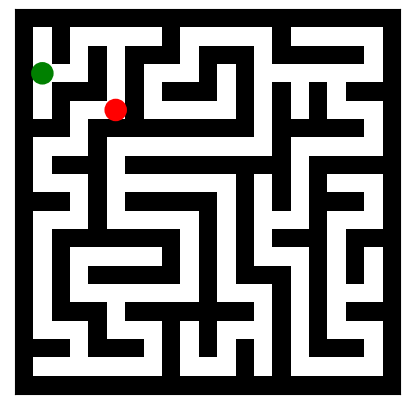

In [84]:
showPNG(m.grid, m.start, m.end)
